In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler

from pandas import read_csv
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100

from UCLA.core.constants import *

### Load Exp data

In [3]:
Xe_data = read_csv("../../data/experimental_data/Xe_5bar_Te.txt", delim_whitespace=True, header=1)
Xe_FWHM_data = read_csv("../../data/experimental_data/Xe_5bar_FWHM.txt", delim_whitespace=True, header=1)


In [4]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

def make_exp_plot():
    fig, ax = plt.subplots(figsize=(10,8), facecolor='white')
    fig.suptitle("Full Experimental Fit and Simulation in Xe at 5 bar", fontsize=20)

    dense_t_list = np.linspace(0,18,num=100)


    #Data and fit
    ax.plot(Xe_data['t[ns]'], Xe_data['T[kK]'], 'r--.', label='Experiment Data')

    ax.set_ylabel(r'$T_e$ [kK]', fontsize=20, color='r')
    ax.set_xlabel('t [ns]', fontsize=20)
    # ax.set_xlim(0,12)

    # ax.set_ylim(40,60)
    ax.tick_params(labelsize=20)
    ax.tick_params(axis='y',color='r', labelcolor='r')

    ax2 = ax.twinx()
    # Plot FWHM
    #Data and fit
    # ax2.plot(Xe_FWHM_data['t[ns]'], Xe_FWHM_data['FWHM[μm]'], 'k--.', label='Experiment Data')

    ax2.set_ylabel(r'$\langle Z \rangle', fontsize=20)
    ax2.tick_params(labelsize=20)
    # ax.set_xscale('log')
    # ax2.set_yscale('log')
    # ax2.set_ylim(40,70)
    ax.set_ylim(10,19)

    # legend_elements = [Line2D([0], [0], color='r', lw=2, label='Experimental Fit',linestyle='--'),
    #                    Line2D([0], [0], marker='x', color='r', label='Exerimental Data',
    #                           markerfacecolor='r', markersize=8,linewidth=0),
    #                    Line2D([0], [0], marker='.', color='r', label='Simulation Output',
    #                           markerfacecolor='r', markersize=8,linewidth=0),
    #                    Line2D([0], [0], color='r', lw=2, label='Simulation Fit', linestyle='-')]

    ax.legend(loc='upper left')
    axs = [ax,ax2]
    return fig, axs

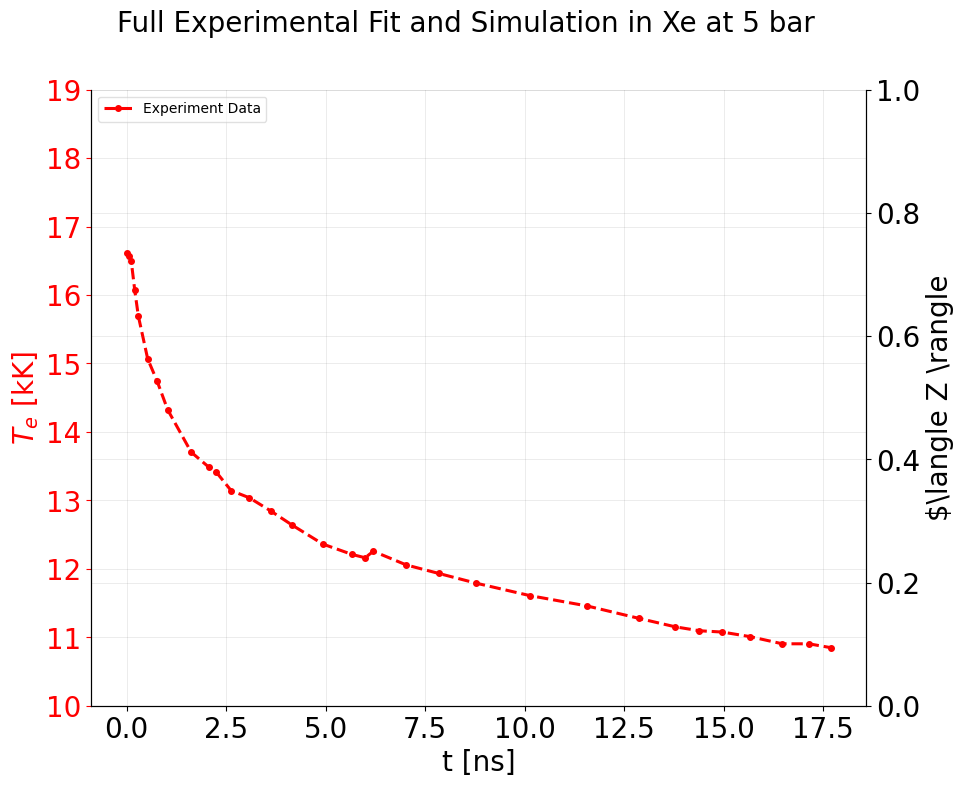

In [5]:
fig, axs = make_exp_plot()

In [6]:
from scipy.interpolate import interp1d 
my_TF_data = [[3000.0, # K and Zstar for Xe at 2e20
  3305.6279369727577,
  3642.3920192315923,
  4013.46427205952,
  4422.339873920664,
  4872.8700780069075,
  5369.298487699417,
  5916.30102762826,
  6519.0299868228685,
  7183.1625488016125,
  7914.95426571168,
  8721.297980199406,
  9609.788750003754,
  10588.795386806314,
  11667.539283171733,
  12856.181270059857,
  14165.917323031917,
  15609.084018620242,
  17199.274734168685,
  18951.467685645894,
  20882.167009435834,
  23009.558216973976,
  25353.67948647674,
  27936.61040518359,
  30782.679939899557,
  33918.695594740944,
  37374.19591455014,
  41181.72871234342,
  45377.157641451835,
  50000.0],
 [0.000,
  0.000,
  0.000,
  0.000,
  0.000,
  0.000,
  0.000,
  0.000,
  0.000,
  0.000,
  0.0032798357608143647,
  0.010289765116688443,
  0.021726028646853024,
  0.03960097907959437,
  0.06529590540239383,
  0.09917318405249631,
  0.14206991368266841,
  0.19443676860029768,
  0.25564122283561375,
  0.32572524746485954,
  0.4050556887516521,
  0.49317649076462544,
  0.5904877785078497,
  0.6977629752107717,
  0.8147466470824298,
  0.9410622666510378,
  1.0785242905201144,
  1.2266292828129863,
  1.3857652761066035,
  1.557591800769309]]

myTFAA_Zbar_func = interp1d(my_TF_data[0], my_TF_data[1], fill_value='extrapolate',bounds_error=False)

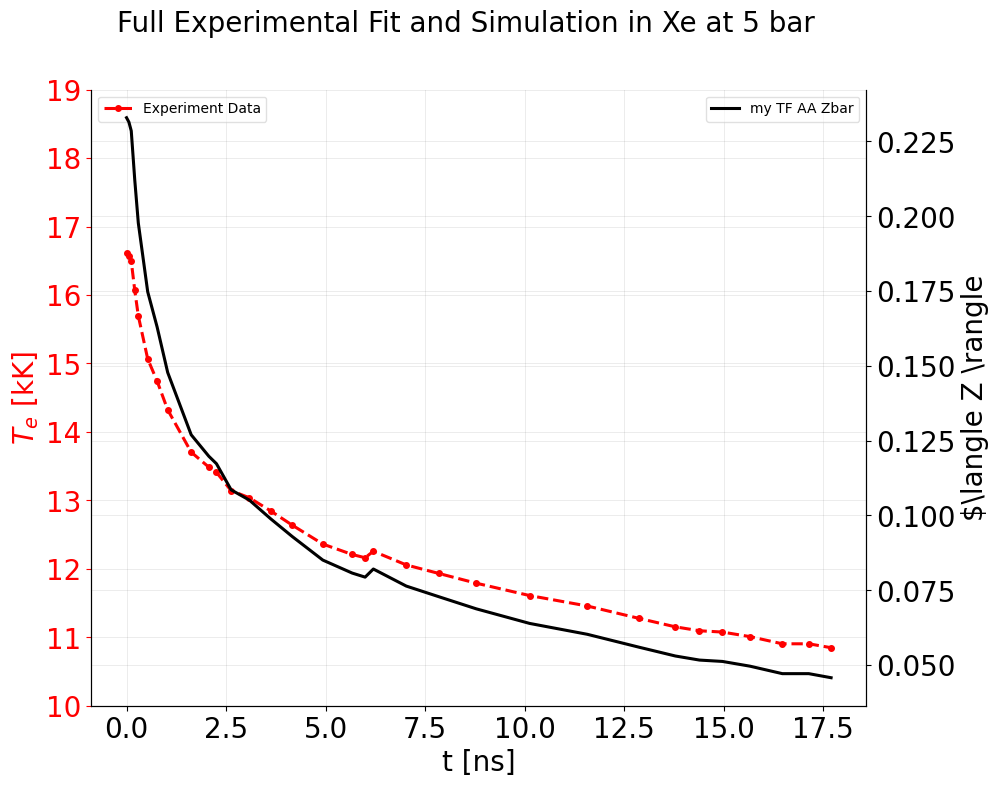

In [7]:
fig, axs = make_exp_plot()

axs[1].plot(Xe_data['t[ns]'], myTFAA_Zbar_func(Xe_data['T[kK]']*1e3), 'k', label='my TF AA Zbar')

axs[1].legend()

In [8]:
Saha_Tk_array = np.array([ 5000.        ,  5117.6551095 ,  5238.07876395,  5361.33611005,
        5487.49382747,  5616.62016489,  5748.78497699,  5884.05976217,
        6022.51770129,  6164.23369721,  6309.28441533,  6457.74832507,
        6609.70574233,  6765.2388729 ,  6924.43185697,  7087.37081463,
        7254.14389248,  7424.84131127,  7599.55541476,  7778.38071965,
        7961.41396671,  8148.7541731 ,  8340.502686  ,  8536.76323735,
        8737.64200004,  8943.24764529,  9153.69140148,  9369.0871143 ,
        9589.55130836,  9815.2032502 , 10046.16501283, 10282.56154174,
       10524.52072256, 10772.17345016, 11025.65369952, 11285.09859817,
       11550.64850042, 11822.44706323, 12100.64132397, 12385.38177996,
       12676.82246985, 12975.121057  , 13280.43891473, 13592.94121366,
       13912.79701104, 14240.17934218, 14575.26531413, 14918.23620142,
       15269.27754417, 15628.57924844, 15996.33568899, 16372.74581439,
       16758.01325469, 17152.34643157, 17555.95867108, 17969.06831902,
       18391.89885914, 18824.67903396, 19267.64296855, 19721.03029719,
       20185.08629298, 20660.06200058, 21146.21437195, 21643.80640542,
       22153.10728792, 22674.39254064, 23207.94416806, 23754.05081051,
       24313.00790033, 24885.11782166, 25470.69007408, 26070.04144   ,
       26683.49615603, 27311.38608842, 27954.05091256, 28611.83829675,
       29285.10409028, 29974.21251595, 30679.53636707, 31401.45720917,
       32140.36558642, 32896.66123288, 33670.75328875, 34463.06052175,
       35274.01155359, 36104.04509193, 36953.61016763, 37823.16637773,
       38713.18413406, 39624.1449177 , 40556.54153948, 41510.8784066 ,
       42487.67179543, 43487.45013089, 44510.75427225, 45558.13780577,
       46630.16734416, 47727.42283309, 48850.49786496, 50000.        ])
Saha_Zbar_array = np.array([5.57880494e-06, 7.85957203e-06, 1.09919198e-05, 1.52654334e-05,
       2.10538923e-05, 2.88447193e-05, 3.92593604e-05, 5.30975222e-05,
       7.13677515e-05, 9.53495898e-05, 1.26642797e-04, 1.67247034e-04,
       2.19643406e-04, 2.86895374e-04, 3.72766353e-04, 4.81856944e-04,
       6.19764334e-04, 7.93266536e-04, 1.01053446e-03, 1.28137496e-03,
       1.61750798e-03, 2.03288152e-03, 2.54402785e-03, 3.17046540e-03,
       3.93514980e-03, 4.86497936e-03, 5.99135967e-03, 7.35083341e-03,
       8.98578239e-03, 1.09452105e-02, 1.32856195e-02, 1.60719923e-02,
       1.93789054e-02, 2.32917991e-02, 2.79084472e-02, 3.33406836e-02,
       3.97164689e-02, 4.71824154e-02, 5.59069415e-02, 6.60843038e-02,
       7.79398731e-02, 9.17372025e-02, 1.07787724e-01, 1.26464372e-01,
       1.48221210e-01, 1.73622427e-01, 2.03386311e-01, 2.38453437e-01,
       2.80093518e-01, 3.30066645e-01, 3.90811812e-01, 4.65294311e-01,
       5.54336995e-01, 6.47008840e-01, 7.22121259e-01, 7.74742517e-01,
       8.11791123e-01, 8.39164790e-01, 8.60322018e-01, 8.77258751e-01,
       8.91183259e-01, 9.02867534e-01, 9.12829098e-01, 9.21429438e-01,
       9.28929914e-01, 9.35525126e-01, 9.41363626e-01, 9.46561306e-01,
       9.51210275e-01, 9.55384972e-01, 9.59146427e-01, 9.62545286e-01,
       9.65624122e-01, 9.68419038e-01, 9.70960928e-01, 9.73276478e-01,
       9.75388847e-01, 9.77318313e-01, 9.79082697e-01, 9.80697765e-01,
       9.82177480e-01, 9.83534320e-01, 9.84779437e-01, 9.85922822e-01,
       9.86973476e-01, 9.87939513e-01, 9.88828249e-01, 9.89646323e-01,
       9.90399754e-01, 9.91093988e-01, 9.91733997e-01, 9.92324296e-01,
       9.92869005e-01, 9.93371867e-01, 9.93836313e-01, 9.94265474e-01,
       9.94662197e-01, 9.95029103e-01, 9.95368582e-01, 9.95682827e-01])
Saha_χ_array = 12.1298437 - 27.211383859999998*np.array([0.00036224, 0.00042499, 0.00049679, 0.00057868, 0.00067174,
       0.00077719, 0.00089623, 0.00103025, 0.00118064, 0.00134894,
       0.00153671, 0.00174565, 0.00197752, 0.00223418, 0.00251756,
       0.0028297 , 0.00317274, 0.0035489 , 0.0039605 , 0.00441   ,
       0.00489995, 0.00543305, 0.00601216, 0.0066403 , 0.0073207 ,
       0.00805685, 0.00885251, 0.00971184, 0.0106394 , 0.01164031,
       0.01272035, 0.01388614, 0.01514529, 0.01650668, 0.01798076,
       0.0195799 , 0.02131892, 0.02321563, 0.02529169, 0.02757353,
       0.0300938 , 0.0328931 , 0.0360225 , 0.03954706, 0.04355088,
       0.04814469, 0.05347747, 0.05975486, 0.06726908, 0.07644724,
       0.08791982, 0.10254182, 0.12086598, 0.14078224, 0.15718062,
       0.16835638, 0.17570401, 0.18059322, 0.18386922, 0.18603553,
       0.18740417, 0.18817836, 0.18849651, 0.18845667, 0.1881306 ,
       0.18757232, 0.18682343, 0.18591665, 0.18487818, 0.18372929,
       0.18248748, 0.18116733, 0.1797811 , 0.17833917, 0.17685044,
       0.17532255, 0.17376209, 0.17217482, 0.17056575, 0.16893928,
       0.16729926, 0.16564909, 0.16399178, 0.16232997, 0.16066602,
       0.15900201, 0.15733978, 0.15568097, 0.15402702, 0.15237922,
       0.1507387 , 0.14910648, 0.14748344, 0.14587037, 0.14426794,
       0.14267677, 0.14109739, 0.13953025, 0.13797576, 0.13643425])

Saha_Zbar_func = interp1d(Saha_Tk_array, Saha_Zbar_array, fill_value='extrapolate',bounds_error=False)
Saha_χ_func    = interp1d(Saha_Tk_array, Saha_χ_array, fill_value='extrapolate',bounds_error=False)

In [9]:
np.array(Xe_data['t[ns]'])

array([ 0.        ,  0.05905512,  0.11811024,  0.20669291,  0.29527559,
        0.53149606,  0.76771654,  1.03346457,  1.62401575,  2.06692913,
        2.25885827,  2.62795276,  3.08562992,  3.61712598,  4.16338583,
        4.93110236,  5.66929134,  5.99409449,  6.2007874 ,  7.02755906,
        7.83956693,  8.78444882, 10.12795276, 11.57480315, 12.87401575,
       13.78937008, 14.39468504, 14.97047244, 15.66437008, 16.47637795,
       17.14074803, 17.70177165])

In [10]:
myTFAA_Zbar_func(Xe_data['T[kK]']*1e3),Saha_Zbar_func(Xe_data['T[kK]']*1e3),Saha_χ_func(Xe_data['T[kK]']*1e3),

(array([0.23294245, 0.23147621, 0.22854373, 0.21204855, 0.19775273,
        0.17475457, 0.1630048 , 0.1477992 , 0.12696606, 0.11979177,
        0.11729637, 0.10856245, 0.10513127, 0.09892915, 0.09295755,
        0.0850859 , 0.08074291, 0.07938573, 0.08210009, 0.07639993,
        0.07287126, 0.06879971, 0.06391402, 0.06028441, 0.05597425,
        0.05302519, 0.05166409, 0.05121039, 0.04962244, 0.04712708,
        0.04712708, 0.04576598]),
 array([0.52001824, 0.5112137 , 0.49360462, 0.40472862, 0.3410772 ,
        0.25606007, 0.22052177, 0.18105085, 0.1340705 , 0.12005597,
        0.11550246, 0.10055507, 0.09504775, 0.0858398 , 0.07636448,
        0.06524517, 0.05979868, 0.05809666, 0.06150071, 0.05454277,
        0.05065995, 0.04630422, 0.0413337 , 0.03747142, 0.03315417,
        0.03056185, 0.0293654 , 0.02896658, 0.02761467, 0.02570664,
        0.02570664, 0.02466589]),
 array([ 9.03309303,  9.08239714,  9.18100535,  9.66308027,  9.99302248,
        10.41737444, 10.59117871, 10.783543

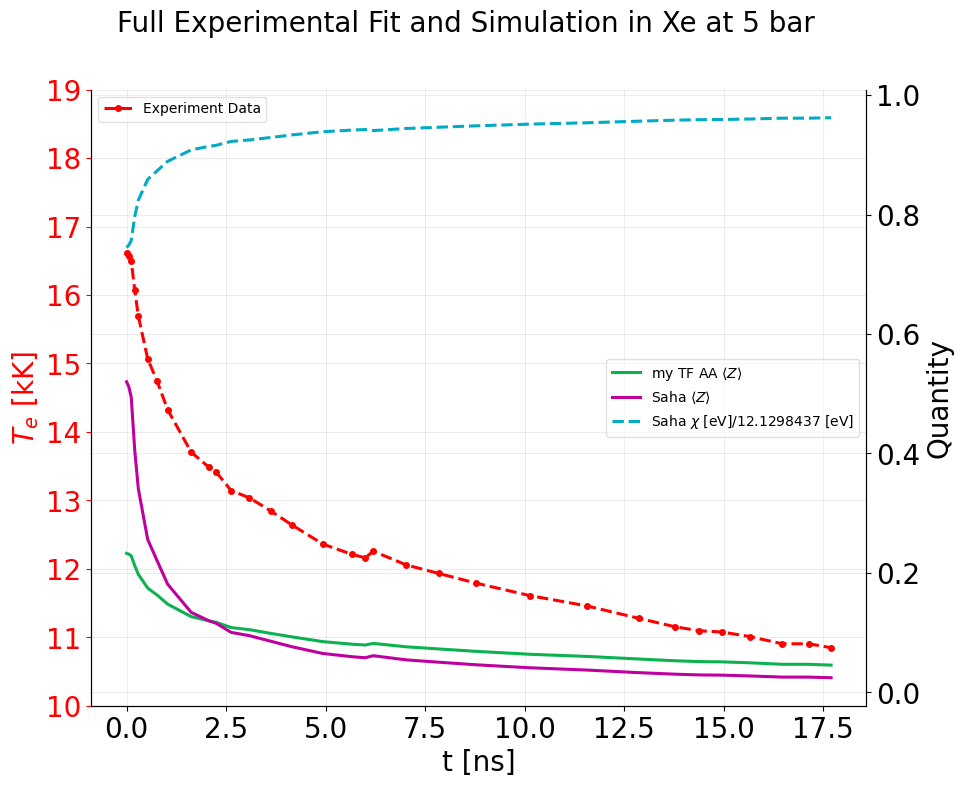

In [12]:
fig, axs = make_exp_plot()

axs[1].plot(Xe_data['t[ns]'], myTFAA_Zbar_func(Xe_data['T[kK]']*1e3)/1, '-', label=r'my TF AA $\langle Z\rangle$')
axs[1].plot(Xe_data['t[ns]'], Saha_Zbar_func(Xe_data['T[kK]']*1e3)/1, '-', label=r'Saha $\langle Z\rangle$')
axs[1].plot(Xe_data['t[ns]'], Saha_χ_func(Xe_data['T[kK]']*1e3)/12.1298437, '--', label=r'Saha $\chi$ [eV]/12.1298437 [eV]')

axs[1].set_ylabel('Quantity')
axs[1].legend()

# plt.savefig('media/Xenon5bar_Zbar_χ_over_Experiment.png', dpi=400)

In [57]:
from UCLA.core.physics import Physical_Parameters as physics
from UCLA.core.constants import *

λ = 400e-9 # m
ω = (2*π*c/λ)
m_i = m_p*54
n_i = 6.243944291216209e20 * 1e6
Zbar = 0.1
n_e = Zbar * 6.243944291216209e20 * 1e6
Ti = 1e3
Te = 11.3e3 # K
    
print(f"Mean free path for Zbar={Zbar}:  {physics.photon_mean_free_path( ω, m_i, n_i, n_e, Ti, Te)*1e6:0.3f} [μm]")
Zbar = 1
n_e = Zbar * 6.243944291216209e20 * 1e6

print(f"Mean free path for Zbar={Zbar}:  {physics.photon_mean_free_path( ω, m_i, n_i, n_e, Ti, Te)*1e6:0.3f} [μm]")
Zbar = 0.43963
n_e = Zbar * 6.243944291216209e20 * 1e6

print(f"Mean free path for Zbar={Zbar}:  {physics.photon_mean_free_path( ω, m_i, n_i, n_e, Ti, Te)*1e6:0.3f} [μm]")

Mean free path for Zbar=0.1:  1765.212 [μm]
Mean free path for Zbar=1:  9.197 [μm]
Mean free path for Zbar=0.43963:  50.000 [μm]
